# Neural Network Intution

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as colors
from  mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import os
import pandas as pd
import time
from datetime import datetime
import sys
import seaborn as sns
import scipy.io
import subprocess
import winsound
import pickle
import glob


# make sure Keras uses CPU instead of GPU
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"] = ""




from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
print("TensorFlow successfully installed.")
if tf.test.is_built_with_cuda():
    print("The installed version of TensorFlow includes GPU support.")
else: 
    print("tensorflow using CPU")
print(sys.version, "\n")
now = datetime.now()
print("last run on " + str(now))


TensorFlow successfully installed.
tensorflow using CPU
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2019-07-08 12:45:57.302900


In [2]:
y = np.random.rand(1000)
x = y
y = np.hstack([y, -y]) + np.random.randn(len(y)*2) * 0.05
x = np.hstack([x, x])

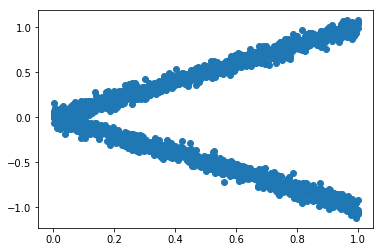

In [3]:
plt.plot(x, y, "o")

In [178]:
# # transform y
# y = abs(y)

In [4]:
# scale data
# scale data 
scalerX = MinMaxScaler([-0.5, 0.5])  
scalerY = MinMaxScaler([-0.5, 0.5])  

# Don't cheat - fit only on training data
scalerX.fit(x.reshape(-1, 1))  
scalerY.fit(y.reshape(-1, 1)) 

Xtrain_scaled = -scalerX.transform(x.reshape(-1, 1))  
Ytrain_scaled = scalerY.transform(y.reshape(-1, 1))  



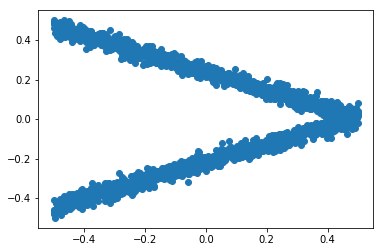

In [5]:
plt.plot(Xtrain_scaled, Ytrain_scaled, "o")

In [181]:
# try to get a network to predict this
# import
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras import regularizers
from keras.models import load_model

# Keras callcacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras.backend as K

In [182]:
# create network
def create_network(optimizer = 'rmsprop', 
                    numUnits = [32, 32, 32, 32], 
                    weightRegularization = 0.0, 
                    dropout_rate=0.0):
    
    '''
    Create a feed forward network.  Assumes Xtrain & Ytrain have been created and scaled
    
    Params: 
    optimizer (str): choice of optimizer
    numUnits (list): number of units in each hidden
    weightRegularization (float): between 0 and 1
    dropout_rate (float): between 0 and 1
    
    '''
    K.clear_session()
    inputs = Input(shape=(Xtrain_scaled.shape[1],))    
    
    # add layers
    for ii in np.arange(0, len(numUnits)):
        if ii >= 1: 
            x = Dense(numUnits[ii], activation='tanh', 
                      kernel_regularizer=regularizers.l1(weightRegularization))(x)

        else: 
            x = Dense(numUnits[ii], activation='tanh')(inputs)


        # add dropout
        if dropout_rate > 0: 
            x = Dropout(dropout_rate)(x)
    
    predictions = Dense(Ytrain_scaled.shape[1], activation='linear')(x)

    # create model
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(loss="mean_squared_error", optimizer = optimizer, metrics = ['mse'])

    return(model)

In [183]:
mod = create_network(numUnits = [320, 320, 320, 320])

In [184]:
mod.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 320)               640       
_________________________________________________________________
dense_2 (Dense)              (None, 320)               102720    
_________________________________________________________________
dense_3 (Dense)              (None, 320)               102720    
_________________________________________________________________
dense_4 (Dense)              (None, 320)               102720    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 321       
Total params: 309,121
Trainable params: 309,121
Non-trainable params: 0
_________________________________________________________________


In [189]:
history = mod.fit(Xtrain_scaled, Ytrain_scaled, epochs = 20, verbose = 2, 
                        batch_size=512, validation_split = 0)

Epoch 1/20
 - 0s - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 2/20
 - 0s - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 3/20
 - 0s - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 4/20
 - 0s - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 5/20
 - 0s - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 6/20
 - 0s - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 7/20
 - 0s - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 8/20
 - 0s - loss: 0.0703 - mean_squared_error: 0.0703
Epoch 9/20
 - 0s - loss: 0.0827 - mean_squared_error: 0.0827
Epoch 10/20
 - 0s - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 11/20
 - 0s - loss: 0.0697 - mean_squared_error: 0.0697
Epoch 12/20
 - 0s - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 13/20
 - 0s - loss: 0.0696 - mean_squared_error: 0.0696
Epoch 14/20
 - 0s - loss: 0.0695 - mean_squared_error: 0.0695
Epoch 15/20
 - 0s - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 16/20
 - 0s - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 17/20
 - 0s

In [190]:
preds = mod.predict(Xtrain_scaled)

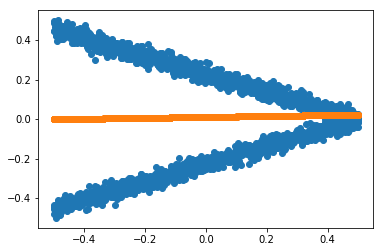

In [191]:
plt.plot(Xtrain_scaled, Ytrain_scaled, "o")
plt.plot(Xtrain_scaled, preds, "o")

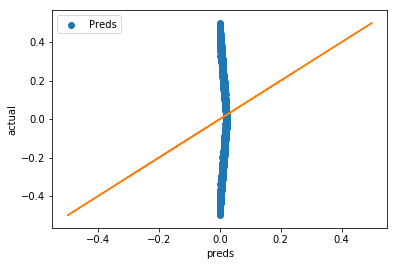

In [196]:
plt.scatter(y = Ytrain_scaled, x = preds, label = "Preds")
plt.plot(Ytrain_scaled, Ytrain_scaled, "-", color = "C1")
plt.xlabel("preds")
plt.ylabel("actual")
plt.legend()

In [ ]:
# what I learned: networks cannot predict y = +- x